# CS4320 - Introduction to Machine Learning 

## Homework 3: Preprocessing 

**Please type your name and A number here:**

In [1]:
Name = "Rylei Mindrum"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02352206"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

## Imports 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Exercise 1: Introducing the dataset <a name="1"></a>
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` locally in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census_df = pd.read_csv("adult.csv")
census_df.shape
print(census_df)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

### 1. Data splitting
rubric={points:4}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

  Split the data into `train_df` (50%) and `test_df` (50%) with `random_state = 10`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.

(_Usually having more data for training is a good idea. But here I'm using 50%/50% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_)

In [4]:
# Insert your code here:
train_df, test_df = train_test_split(census_df, test_size=0.5, random_state=10)
print(train_df)
print(test_df)

       age         workclass  fnlwgt     education  education.num  \
27978   23  Self-emp-not-inc  111296          11th              7   
3853    75           Private  104896       HS-grad              9   
12294   52           Private  256916       HS-grad              9   
10017   18                 ?  387641  Some-college             10   
27073   27         Local-gov  332785       HS-grad              9   
...    ...               ...     ...           ...            ...   
28017   31           Private  227886  Some-college             10   
17728   23                 ?  169104    Assoc-acdm             12   
29199   38         Local-gov  282753     Assoc-voc             11   
7293    47           Private  357848       HS-grad              9   
17673   31           Private   25216     Bachelors             13   

           marital.status       occupation relationship                race  \
27978       Never-married     Craft-repair    Own-child               White   
3853   Marrie

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [5]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [6]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(16280, 15)

In [7]:
train_df_nan.sort_index() # The "?" symbols are now replaced with NaN values. 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [8]:
# Task 1: (Hint: just print the train_df_nan.info and train_df_nan.describe)
print(train_df_nan.info())
print("\n")
print(train_df_nan.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 27978 to 17673
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       15403 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education.num   16280 non-null  int64 
 5   marital.status  16280 non-null  object
 6   occupation      15398 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital.gain    16280 non-null  int64 
 11  capital.loss    16280 non-null  int64 
 12  hours.per.week  16280 non-null  int64 
 13  native.country  15998 non-null  object
 14  income          16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB
None


                age workclass        fnlwgt education  education.num  \
count   16

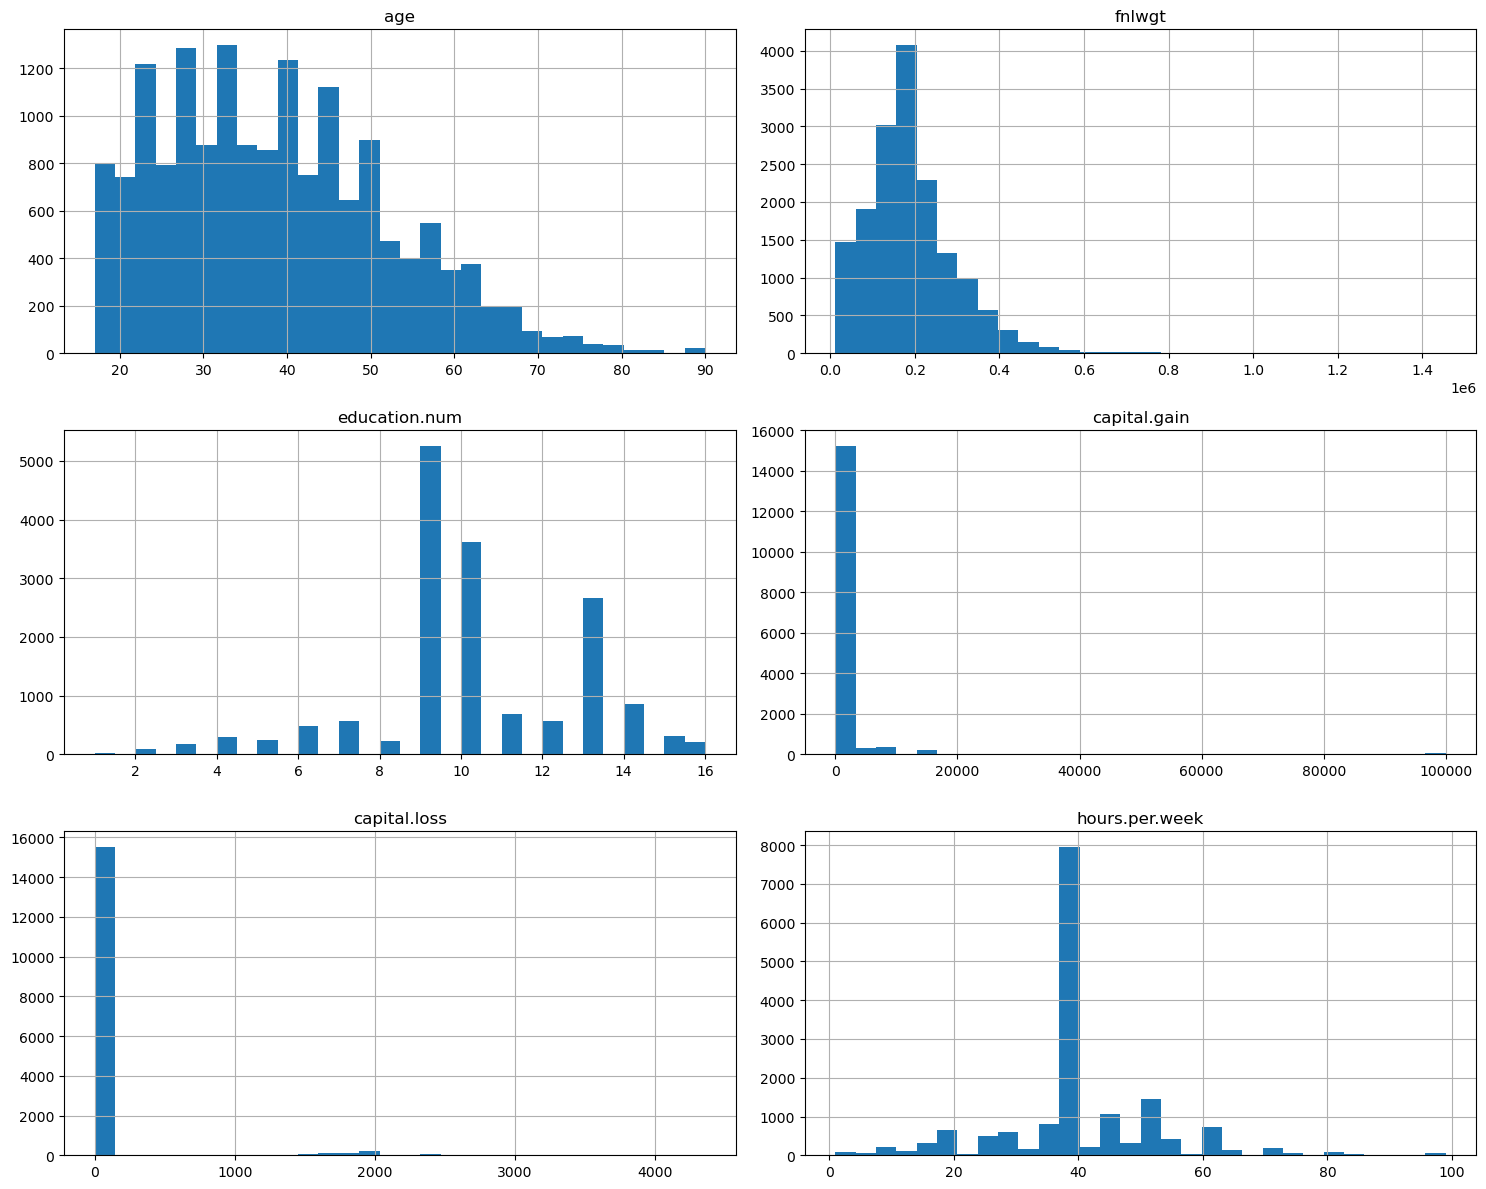

In [9]:
# Task 2:
train_df_nan.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


In [10]:
# Task 3:
# Pick the features
# Answer:age, hours.per.week, capital gain/loss, occupation, gender

### 2.2 Identify transformations to apply
rubric={points:20}

**Your tasks:**
1. Identify what kind of feature transformations you would apply on each column in the dataset and fill in the table below accordingly. You may decide to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. We use imputation and One-Hot encoding for feature occupation here. {points: 13} 
2. Identify different feature types for applying different transformations. In particular, fill in the lists below. {points: 5} 
3. Is including the `race` feature for predicting income ethically a good idea? Briefly discuss. {points: 2}

> Note: This question is a bit open-ended and there is no single correct solution.

Task 1:
Fill in the table with feature transformation techniques. You can drop this column by filling in "drop".{points:13}

| Feature | Transformation |
| --- | ----------- |
| occupation | imputation, One-Hot Encoding |
| age | Scaling |
| workclass | imputation |
| fnlwgt | Scaling |
| education | imputation |
| education.num | Scaling |
| marital.status | imputation, One-Hot Encoding |
| relationship | imputation, One-Hot Encoding |
| race | drop |
| sex | One-Hot Encoding |
| capital.gain | Scaling |
| capital.loss | Scaling |
| hours.per.week | Scaling |
| native.country | drop |


In [11]:
# Task 2: fill in the lists with feature name.
# Example: numeric_features = ["age"] 
# It's OK to keep some of the lists empty or add new lists.{points:5}
# Features lists
numeric_features = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"] 
categorical_features = ["workclass", "marital.status", "occupation", "relationship", "native.country"] 
ordinal_features = ["education"] 
binary_features = ["sex"] 
drop_features = []  # do not include these features in modeling, could be "fnlwgt" or "education.num"
passthrough_features = [] # do not apply any transformation

target = "income"

In [12]:
# Task 3: Is including the `race` feature for predicting income ethically a good idea? Briefly discuss.{points:2}
#(Type your answer here): I do not think that race should be included when predicting income ethically. There is a potential for misuse of the results if race is included in the data. Although it could improve the accuracy of the model I believe that ethical considerations and fairness are equally, if not more important. 

### 2.3 Separating feature vectors and targets  
rubric={points:6}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`. {points: 4}
2. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not? {points: 2}

In [13]:
# Task 1 (Split the dataset):
X_train = train_df_nan.drop(columns=['income'])
y_train = train_df_nan['income']

X_test = test_df_nan.drop(columns=['income'])
y_test = test_df_nan['income']
print(X_train)
print(y_train)
print(X_test)
print(y_test)

       age         workclass  fnlwgt     education  education.num  \
27978   23  Self-emp-not-inc  111296          11th              7   
3853    75           Private  104896       HS-grad              9   
12294   52           Private  256916       HS-grad              9   
10017   18               NaN  387641  Some-college             10   
27073   27         Local-gov  332785       HS-grad              9   
...    ...               ...     ...           ...            ...   
28017   31           Private  227886  Some-college             10   
17728   23               NaN  169104    Assoc-acdm             12   
29199   38         Local-gov  282753     Assoc-voc             11   
7293    47           Private  357848       HS-grad              9   
17673   31           Private   25216     Bachelors             13   

           marital.status       occupation relationship                race  \
27978       Never-married     Craft-repair    Own-child               White   
3853   Marrie

In [14]:
# Task 2: 
# Answer: No. there are missing values, svc expects numerical values not categorial ones (workclass, etc), and the scaling will be too complex unless the data is scaled down. 

## Exercise 3: Preprocessing <a name="3"></a>
<hr>

### 3.1 Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`
rubric={points:18}

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that you can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly you can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

You may use the method of your choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

**Your tasks:**

1. Create a column transformer `preprocessor` based on transformations you want to apply on the data from 2.2. {points: 10}
2. Transform the data by calling `fit_transform` on the training set. What's the shape of the transformed data? {points: 4} 
3. Why do we need to use a column transformer in this case? Briefly explain. {points: 4} 

In [15]:
# Task 1:
preprocessor = make_column_transformer(
    
    # numeric
    (make_pipeline(
        StandardScaler()
    ), numeric_features),
    
    # cat
    (make_pipeline(
        SimpleImputer(strategy='most_frequent'), # handle missing values
        OneHotEncoder(handle_unknown="ignore")
    ), categorical_features),
    
    #binary
    (make_pipeline(
        OrdinalEncoder()
    ), binary_features)
)

In [16]:
# Task 2:
X_train_transformed = preprocessor.fit_transform(X_train)
print(f"The shape of the transformed training data: {X_train_transformed.shape}")

The shape of the transformed training data: (16280, 82)


In [17]:
# Task 3:
# Answer:we need to use a column transformer in this case because it provides a consistent way to apply the transformations to their sprcific columns. It makes it so that the data is preprocessed before its modeled. 

## Exercise 4: Building models <a name="4"></a>
<hr>

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Feel free to use it to keep track of your results if you like. 

In [18]:
results_dict = {}  # dictionary to store all the results

In [19]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

### 4.1 Baseline model 
rubric={points:6}

**Your tasks:**
1. Define a pipeline with two steps: `preprocessor` from 3.1 and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier. {points:3} 
2. Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict` above. Display the results as a pandas DataFrame.  {points:3} 

> You may use the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [20]:
# Task 1:
baseline_pipeline = make_pipeline(
    preprocessor, 
    DummyClassifier(strategy="prior")
)

In [21]:
# Task 2:
results = mean_std_cross_val_scores(baseline_pipeline, X_train, y_train, cv=5, return_train_score=True)

results_dict["Baseline model"] = results
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
Baseline model,0.027 (+/- 0.001),0.009 (+/- 0.002),0.759 (+/- 0.000),0.759 (+/- 0.000)


### 4.2 Trying different classifiers
rubric={points:12}

**Your tasks:**

1. For each of the models in the starter code below: {points: 5}
    - Define a pipeline with two steps: `preprocessor` from 3.1 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline.  
    - Store the results in `results_dict`. 
2. Display all the results so far as a pandas dataframe. {points: 2}
3. Compare the train and validation accuracies and `fit` and `score` times in each case. How do the the validation accuracies compare to the baseline model from 4.1? Which model has the best validation accuracy? Which model is the fastest one(Pick one from: Dummy classifier, decision tree, KNN, SVM)? {points: 5} 

> Note that this might take a while to run.

> You may use the function above `mean_std_cross_val_scores` to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [22]:
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

In [23]:
# Task 1:
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    results = mean_std_cross_val_scores(pipeline, X_train, y_train, cv=5, return_train_score=True)
    results_dict[name] = results

In [24]:
# Task 2:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
Baseline model,0.027 (+/- 0.001),0.009 (+/- 0.002),0.759 (+/- 0.000),0.759 (+/- 0.000)
decision tree,0.345 (+/- 0.004),0.010 (+/- 0.001),0.808 (+/- 0.005),1.000 (+/- 0.000)
kNN,0.033 (+/- 0.003),1.490 (+/- 0.085),0.831 (+/- 0.005),0.882 (+/- 0.002)
RBF SVM,2.748 (+/- 0.083),0.456 (+/- 0.033),0.854 (+/- 0.005),0.867 (+/- 0.002)


In [25]:
# Task 3:
# Answer: The RBF SVm has the highest accuracy but it is the slowest to train. kNN is pretty accurate but it is also quite slow. decision tree has a mix of both, its not fastest or slowest and its not most or least accurate. It may be overfit though cause of its training score. 

### 4.3 Exploring importance of scaling
rubric={points:10}

In this exercise you'll examine whether scaling helps in case of KNNs and SVM RBFs. 

**Your tasks:**

1. Create a column transformer without the `StandardScaler` step for `numeric_features`. {points:4} 
2. Repeat the steps in 4.2 with this new column transformer. Save all results in "results_dic_compare" {points: 4}
3. Compare the results of scaled numeric features with unscaled numeric features. Is scaling necessary for decision trees? Why or why not? {points:2}

In [26]:
results_dict_compare = {}  # dictionary to store all the results

In [27]:
#X_transformed = preprocessor_without_scaling.fit_transform(X_train)
print(categorical_features)
for feature in categorical_features:
    print(f"{feature}: {X_train[feature].unique()}")
print(X_train[categorical_features].dtypes)
print(OneHotEncoder(handle_unknown='ignore').fit_transform(X_train[categorical_features]))
X_train_filled = X_train.fillna("Missing")


['workclass', 'marital.status', 'occupation', 'relationship', 'native.country']
workclass: ['Self-emp-not-inc' 'Private' nan 'Local-gov' 'State-gov' 'Federal-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
marital.status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation: ['Craft-repair' 'Sales' 'Exec-managerial' nan 'Protective-serv'
 'Prof-specialty' 'Handlers-cleaners' 'Other-service' 'Transport-moving'
 'Adm-clerical' 'Farming-fishing' 'Machine-op-inspct' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']
relationship: ['Own-child' 'Husband' 'Not-in-family' 'Wife' 'Unmarried' 'Other-relative']
native.country: ['Mexico' 'United-States' 'India' 'Jamaica' 'Greece' nan 'Columbia'
 'Canada' 'Germany' 'England' 'Puerto-Rico' 'South' 'Cuba' 'Philippines'
 'Haiti' 'Hong' 'Portugal' 'Vietnam' 'France' 'Italy' 'Cambodia' 'China'
 'Dominican-Republic' 'Yugoslavia' 'Poland' 'Ireland' 'El-Salvador'
 'Guatemala' 'Hun

In [28]:
# Task 1:
preprocessor_without_scaling = make_column_transformer(
    (SimpleImputer(strategy='most_frequent'), numeric_features),  # only imputation for numeric features
    (make_pipeline(
        SimpleImputer(strategy='most_frequent'),
        OneHotEncoder(handle_unknown="ignore")
    ), categorical_features),
    (make_pipeline(
        OrdinalEncoder()
    ), binary_features)
)

In [29]:
# Task 2: 
# Extract the race column
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

for name, model in models.items():
    pipeline = make_pipeline(preprocessor_without_scaling, model)
    results = mean_std_cross_val_scores(pipeline, X_train, y_train, cv=5, return_train_score=True)
    results_dict_compare[name] = results

# Displaying the results
pd.DataFrame(results_dict_compare).T    

,fit_time,score_time,test_score,train_score
decision tree,0.314 (+/- 0.012),0.010 (+/- 0.001),0.808 (+/- 0.004),1.000 (+/- 0.000)
kNN,0.032 (+/- 0.003),1.103 (+/- 0.082),0.776 (+/- 0.006),0.828 (+/- 0.003)
RBF SVM,3.317 (+/- 0.293),0.717 (+/- 0.052),0.787 (+/- 0.002),0.787 (+/- 0.001)


In [30]:
# Task 3:
# Answer: the decision tree result stayed about the same with/wothout scale. The kNN and RBF SVM models both decreased in performance when the features were not scaled. 

### 4.4 Hyperparameter optimization
rubric={points:8}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter: `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` in the starter code below: 
    - Create a pipeline object with two steps: preprocessor from 3.1 and `SVC` classifier with the value of `C`.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. {points:4} 
2. The hyperparameter `C = 1.0` is the default value in `scikit-learn`. Does this default value (`C = 1.0`) seem reasonable, meaning it is performing the best or comparable to the best `C` values? {points:4}

> Note: Running this might take a while.(Waite patiently: about 9 min on colab) 

In [31]:
param_grid = {"C": np.logspace(-2, 2, 5)}
param_grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

In [32]:
# Task 1:
svc_results_dict = {}

# Iterate over each value of C in the parameter grid
for C_val in param_grid["C"]:
    print(f"Testing with C = {C_val}...")
    # Create the pipeline
    pipeline = make_pipeline(preprocessor, SVC(C=C_val))
    
    # Carry out 5-fold cross-validation
    results = mean_std_cross_val_scores(pipeline, X_train, y_train, cv=5, return_train_score=True)
    
    # Store results in the dictionary with C value as key
    svc_results_dict[f"SVC_C_{C_val}"] = results

# Convert results dictionary to a pandas DataFrame and display it
svc_results_df = pd.DataFrame(svc_results_dict).T
svc_results_df

Testing with C = 0.01...
Testing with C = 0.1...
Testing with C = 1.0...
Testing with C = 10.0...
Testing with C = 100.0...


,fit_time,score_time,test_score,train_score
SVC_C_0.01,3.564 (+/- 0.313),0.659 (+/- 0.036),0.802 (+/- 0.004),0.804 (+/- 0.004)
SVC_C_0.1,2.709 (+/- 0.039),0.496 (+/- 0.021),0.851 (+/- 0.007),0.853 (+/- 0.002)
SVC_C_1.0,2.674 (+/- 0.058),0.460 (+/- 0.022),0.854 (+/- 0.005),0.867 (+/- 0.002)
SVC_C_10.0,3.655 (+/- 0.064),0.458 (+/- 0.003),0.853 (+/- 0.004),0.891 (+/- 0.002)
SVC_C_100.0,6.929 (+/- 0.114),0.513 (+/- 0.099),0.837 (+/- 0.006),0.917 (+/- 0.002)


In [33]:
# Task 2:
# Answer: the svc model with c=1.0 had the best performance. it had a test accuracy of 85.4% which is better than all of the other values that were tested. therefore, having the default at 1.0 seems most reasonable. 

## Exercise 5: Evaluating on the test set <a name="5"></a>
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 5.1 Scoring on the unseen test set 
rubric={points:6}

**Your tasks:**

1. Train the best performing model on the entire training set. {points:2} 
2. Report the results of this model on `X_test`. Hint: Categorical features may be different in training set and test set. So, when you make your preprocessor, you need to make argment "handle_unknown='ignore'" {points: 2}
3. Are the cross-validation results and test results consistent? {points:2} 

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
# Task 1:
svc_best = SVC(C=1.0)
pipeline_best = make_pipeline(preprocessor, svc_best)
pipeline_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'native.country']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['sex'])])),
                ('svc', SVC())])

In [36]:
# Task 2:
y_pred_test = pipeline_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {test_accuracy:.4f}")

Accuracy on the test set: 0.8543


In [37]:
# Task 3:
# Answer: the cross-validation results awere consistent between the two tests. Both round to 84.5% which means that they are consistent. 

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.